In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.cosmology import Planck15
from astropy.table import Table
from scipy.interpolate import InterpolatedUnivariateSpline as ius
import camb
%matplotlib inline

All bias tertile values

In [2]:
#ELGs
pred_908_5em4 = np.array([3.544520079334008, 4.088403924922012, 5.604914980547013]) #predicted; log[sSFR]=-9.08, n=5e-4 
ideal_908_5em4 = np.array([-0.6703010644119957, 3.6507218400888326, 10.239927595484922]) #ideal log[sSFR]=-9.08, n=5e-4 
pred_923_5em4 = np.array([3.743691039274663, 4.394911452321106, 6.621681125508712]) #predicted; log[sSFR]=-9.23, n=5e-4 
ideal_923_5em4 = np.array([-0.2352597909985523, 4.389900787948726, 10.590684158386361]) #ideal log[sSFR]=-9.23, n=5e-4 
pred_908_7em4 = np.array([2.2786690473256046, 3.908159130154705, 5.128042075659825]) #predicted; log[sSFR]=-9.08, n=7e-4 
ideal_908_7em4 = np.array([-1.239641362011536, 3.010540984391233, 9.53458846966887]) #ideal log[sSFR]=-9.08, n=7e-4 
pred_923_7em4 = np.array([3.7125697348722504, 4.469325280135138, 5.938034341021201]) #predicted; log[sSFR]=-9.23, n=7e-4 
ideal_923_7em4 = np.array([-0.3000166091291015, 4.170022985683978, 10.249922979473713]) #ideal log[sSFR]=-9.23, n=7e-4 
pred_908_1em3 = np.array([1.221962687000506, 3.3424924379592107, 4.959087582942547]) #predicted; log[sSFR]=-9.08, n=1e-3 
ideal_908_1em3 = np.array([-1.9525329062484176, 2.453687012748513, 9.016477063984572]) #ideal log[sSFR]=-9.08, n=1e-3 
pred_923_1em3 = np.array([3.2707719864674876, 4.377063485544664, 5.752921558503144]) #predicted; log[sSFR]=-9.23, n=1e-3 
ideal_923_1em3 = np.array([-0.4649653062596706, 3.9496367569435877, 9.916085579831377]) #ideal log[sSFR]=-9.23, n=1e-3 

b1_pred_908_5em4 = np.array([1.368523063378256, 1.3740865671930427, 1.578245121785074]) #predicted; log[sSFR]=-9.08, n=5e-4 
b1_ideal_908_5em4 = np.array([1.5341420034033244, 1.4260072433306685, 1.3615233237282538]) #ideal log[sSFR]=-9.08, n=5e-4 
b1_pred_923_5em4 = np.array([1.455508706577064, 1.473552754544864, 1.4518308759692597]) #predicted; log[sSFR]=-9.23, n=5e-4 
b1_ideal_923_5em4 = np.array([1.5806360636990993, 1.4624404393679875, 1.3382862376223041]) #ideal log[sSFR]=-9.23, n=5e-4 
b1_pred_908_7em4 = np.array([1.3428938363029739, 1.3506786781891973, 1.5205984024383743]) #predicted; log[sSFR]=-9.08, n=7e-4 
b1_ideal_908_7em4 = np.array([1.4763520949224658, 1.3754482257628267, 1.3627264849349052]) #ideal log[sSFR]=-9.08, n=7e-4 
b1_pred_923_7em4 = np.array([1.4251461258121443, 1.4161006916796124, 1.5113846199137007]) #predicted; log[sSFR]=-9.23, n=7e-4 
b1_ideal_923_7em4 = np.array([1.563996429537952, 1.4465217979901799, 1.342113209877326]) #ideal log[sSFR]=-9.23, n=7e-4 
b1_pred_908_1em3 = np.array([1.2957115409674413, 1.3606195341208842, 1.4979919239339572]) #predicted; log[sSFR]=-9.08, n=1e-3 
b1_ideal_908_1em3 = np.array([1.4126941347195123, 1.365816851872313, 1.3760298571115595]) #ideal log[sSFR]=-9.08, n=1e-3 
b1_pred_923_1em3 = np.array([1.3297354294607637, 1.3857080577308827, 1.5256157754683353]) #predicted; log[sSFR]=-9.23, n=1e-3 
b1_ideal_923_1em3 = np.array([1.5023985082169484, 1.409425165105068, 1.3292355893379653]) #ideal log[sSFR]=-9.23, n=1e-3 

elg_sample_keys = ['908_5em4', '923_5em4', '908_7em4', '923_7em4', '908_1em3', '923_1em3']
b1_pred_all = [b1_pred_908_5em4, b1_pred_923_5em4, b1_pred_908_7em4, b1_pred_923_7em4, b1_pred_908_1em3, b1_pred_923_1em3]
b1_ideal_all = [b1_ideal_908_5em4, b1_ideal_923_5em4, b1_ideal_908_7em4, b1_ideal_923_7em4, b1_ideal_908_1em3, b1_ideal_923_1em3]
pred_all = [pred_908_5em4, pred_923_5em4, pred_908_7em4, pred_923_7em4, pred_908_1em3, pred_923_1em3]
ideal_all = [ideal_908_5em4, ideal_923_5em4, ideal_908_7em4, ideal_923_7em4, ideal_908_1em3, ideal_923_1em3]

#LRGs 
pred_923_lrg = np.array([4.765716414946634, 5.9549931921998365, 7.75493589931854]) #LRG,sSFR=9.23, predicted 
ideal_923_lrg = np.array([2.412278589095597, 5.83082961743106, 10.209163701819296]) #LRG,sSFR=9.23, ideal 
pred_908_lrg = np.array([4.806742775850117, 5.937105551023172, 7.797199627812598]) #LRG,sSFR=9.08, predicted 
ideal_908_lrg = np.array([2.445415210013078, 5.862219998243689, 10.233412746429119]) #LRG,sSFR=9.08, ideal 

b1_pred_923_lrg = np.array([2.089222348953488, 2.374255404032579, 2.641978472296446]) #LRG,sSFR=9.23, predicted 
b1_ideal_923_lrg = np.array([2.485217714635107, 2.281970199414223, 2.341133501431893]) #LRG,sSFR=9.23, ideal 
b1_pred_908_lrg = np.array([2.1094163428006696, 2.31840315732481, 2.6874695431234548]) #LRG,sSFR=9.08, predicted 
b1_ideal_908_lrg = np.array([2.4887596134573653, 2.2869975538136895, 2.33953187597788]) #LRG,sSFR=9.08, ideal 

lrg_sample_keys = ['923_lrg', '908_lrg']
b1_pred_lrg = [b1_pred_923_lrg, b1_pred_908_lrg]
b1_ideal_lrg = [b1_ideal_923_lrg, b1_ideal_908_lrg]
pred_lrg = [pred_923_lrg, pred_908_lrg]
ideal_lrg = [ideal_923_lrg, ideal_908_lrg]

In [7]:
def run_camb(z,Omm,H0,mnu,Omb,As,ns,kmax=100.):
    h=H0/100
    Omcdm=Omm-Omb-(mnu/93.14)*h**-2 #this, of course, is a choice
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=h*100,
                       ombh2=Omb*h**2,
                       omch2=Omcdm*h**2,
                       mnu=mnu, num_massive_neutrinos=1 if mnu>0.0 else 0,
                       omk=0, tau=0.06) 
    pars.InitPower.set_params(ns=ns,
                              As=As)
    pars.set_matter_power(redshifts=[z]) #need to compute at z=0 to get s8
    pars.share_delta_neff = True
    pars.Transfer.kmax=kmax
    results = camb.get_results(pars)
    transfers=results.get_matter_transfer_data().transfer_data
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=kmax, npoints = 1024)
    sigma8= results.get_sigma8()
    return kh, pk, transfers[:,:,0],sigma8

cosmo = [0.2589+0.0486+0.,67.74,0.0,0.0486,np.exp(3.064)*1e-10,0.9667]

In [8]:
# Fisher expression for multitracer (2 tracers)
def Ffnl_P_12(b1,b2,bphi2,nbar1,nbar2,alpha,pk):
    alpha_b = b1/b2
    P2 =  b2**2 * pk
    X1,X2 = 1/(nbar1*P2),1/(nbar2*P2)
    rsq = alpha_b**2 /(alpha_b**2 *(1+ X2) + X1*(1+X2) )
    jacsq = (2*bphi2*alpha/b2 *P2)**2
    num = (alpha_b**2 * X2 + X1)**2 + 2*(1-rsq)*alpha_b**2 *(alpha_b**2 *(1-rsq) + alpha_b**2 *X2 + X1*(1-X2))  
    denom = 2*P2**2 * (alpha_b**2 *(1-rsq) + alpha_b**2 *X2 + X1 + X1*X2)**2 
    FP2 = num/denom
    return FP2*jacsq

def Ffnl_alpha_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,pk):
    alpha_b = b1/b2
    P2 = b2**2 * pk
    X1,X2 = 1/(nbar1*P2),1/(nbar2*P2)
    rsq = alpha_b**2 /( alpha_b**2 *(1+ X2) + X1*(1+X2) )
    jacsq = ( alpha_b*alpha*(bphi1/b1 - bphi2/b2) )**2
    num = alpha_b**2 * X2*(1+2*X2) + rsq*X1*(1+X2) + alpha_b**2 *(1-rsq)*(2-rsq+3*X2)
    denom = (alpha_b**2 *(1-rsq) + alpha_b**2 *X2 + X1 + X1*X2)**2 
    Falpha = num/denom
    return Falpha*jacsq

def Ffnl_alpha_P2_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,pk): 
    alpha_b = b1/b2
    P2 = b2**2 * pk
    X1,X2 = 1/(nbar1*P2),1/(nbar2*P2)
    rsq = alpha_b**2 /( alpha_b**2 *(1+ X2) + X1*(1+X2) )
    jacsq = ( alpha_b*alpha*(bphi1/b1 - bphi2/b2) ) * (2*bphi2*alpha/b2 *P2)
    num = alpha_b*( rsq*X1*X2 + (1-rsq +X2)**2 *alpha_b**2 )
    denom = P2 * (alpha_b**2 *(1-rsq) + alpha_b**2 *X2 + X1 + X1*X2)**2 
    FalphaP2 = num/denom
    return FalphaP2*jacsq

def Ffnl_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,k,pk,V,use_P2=True):
    prefac = k**2 *V/(2*np.pi**2)
    if(use_P2):
        Fsum = Ffnl_alpha_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,pk
                         ) + 2*Ffnl_alpha_P2_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,pk
                                                ) + Ffnl_P_12(b1,b2,bphi2,nbar1,nbar2,alpha,pk)
    else:
        Fsum = Ffnl_alpha_12(b1,bphi1,b2,bphi2,nbar1,nbar2,alpha,pk)
    return np.trapz(prefac*Fsum,k) 


Triple tracer

In [9]:
#Fisher elements
def Falphaalpha(b1,b2,b3,nbar1,nbar2,nbar3,pk):
    alpha_b,beta_b = b1/b2,b3/b2
    P2 = b2**2 *pk
    X1,X2,X3 = 1/(nbar1*P2),1/(nbar2*P2),1/(nbar3*P2)
    r12sq = alpha_b**2 /( (alpha_b**2 +X1)*(1+ X2) ) 
    r13sq = (alpha_b*beta_b)**2 /( (alpha_b**2 +X1) *(beta_b**2 + X3) )
    r23sq = beta_b**2 /( (beta_b**2 +X3)*(1+ X2) ) #above with swaps
    r12,r13,r23 = np.sqrt(r12sq),np.sqrt(r13sq),np.sqrt(r23sq)
    
    num = ( 2*(1+X2)**2 *X3**2 *alpha_b**2 +(1+X2)*X3*( 4*(1-r23sq+X2)*alpha_b**2
                                                        +r13sq*(1+X2)*(X1-3*alpha_b**2)
                                                      )*beta_b**2
           + ( (r13sq*(1+X2)*alpha_b)**2 +2*(1-r23sq+X2)**2 *alpha_b**2
              +r13sq*(1-r23sq+X2)*(1+X2)*(X1-3*alpha_b**2) )*beta_b**4
           -4*(r12sq*r12)*r13*r23*alpha_b**2 *beta_b**2 *(X3+beta_b**2) 
           + r12sq**2 *alpha_b**2 *(X3+beta_b**2)**2
           -2*r12*r13*r23*beta_b**2 *(X1*(1+X2)*X3 + X1*(1-r23sq+X2)*beta_b**2
                                      +alpha_b**2 *(-3*(1+X2)*X3 + (-3*(1-r23sq+X2) 
                                                                    + 2*r13sq*(1+X2) 
                                                                   )*beta_b**2 
                                                   ) 
                                     )
           +r12sq*(X1*(X3+beta_b**2)*((1+X2)*X3 +(1-r23sq+X2)*beta_b**2)
                   +alpha_b**2 *(-3*(1+X2)*X3**2 + (3*r23sq -6*(1+X2) +2*r13sq*(1+X2))*X3*beta_b**2
                                 +( -3*(1-r23sq+X2) + 2*r13sq*(1+2*r23sq+X2) )*beta_b**4
                   )
           )
           
    )
    denom = ( X1*(1+X2)*X3 + X1*(1-r23sq +X2)*beta_b**2 
            + alpha_b**2 *( (1-r12sq+X2)*X3 
                           +(1-r12sq -r13sq + 2*r12*r13*r23 - r23sq 
                           +(1-r13sq)*X2 )*beta_b**2)
            )**2
    return num/denom

def Falphabeta(b1,b2,b3,nbar1,nbar2,nbar3,pk):
    alpha_b,beta_b = b1/b2,b3/b2
    P2 = b2**2 *pk
    X1,X2,X3 = 1/(nbar1*P2),1/(nbar2*P2),1/(nbar3*P2)
    r12sq = alpha_b**2 /( (alpha_b**2 +X1)*(1+ X2) ) 
    r13sq = (alpha_b*beta_b)**2 /( (alpha_b**2 +X1) *(beta_b**2 + X3) )
    r23sq = beta_b**2 /( (beta_b**2 +X3)*(1+ X2) )
    r12,r13,r23 = np.sqrt(r12sq),np.sqrt(r13sq),np.sqrt(r23sq)
    
    num = ( (r13-r12*r23+r13*X2)*alpha_b*beta_b*( X1*(r13-2*r12*r23+r13*X2)*X3
                                                 +r13*(-1+r12sq-X2)*X3*alpha_b**2
                                                +r13*(X1*(-1+r23sq-X2)
                                                      + (-1+r12sq+r13sq-2*r12*r13*r23+r23sq+(-1+r13sq)*X2)*alpha_b**2 )*beta_b**2)
    )

    denom = ( X1*(1+X2)*X3 + X1*(1-r23sq +X2)*beta_b**2 
            + alpha_b**2 *( (1-r12sq+X2)*X3 
                           +(1-r12sq -r13sq + 2*r12*r13*r23 - r23sq 
                           +(1-r13sq)*X2 )*beta_b**2)
            )**2
    return num/denom

def Fbetabeta(b1,b2,b3,nbar1,nbar2,nbar3,pk):
    # just Falphaalpha(b1->b3,b3->b1)
    return Falphaalpha(b3,b2,b1,nbar3,nbar2,nbar1,pk)

def FalphaP2(b1,b2,b3,nbar1,nbar2,nbar3,pk):
    alpha_b,beta_b = b1/b2,b3/b2
    P2 = b2**2 *pk
    X1,X2,X3 = 1/(nbar1*P2),1/(nbar2*P2),1/(nbar3*P2)
    r12sq = alpha_b**2 /( (alpha_b**2 +X1)*(1+ X2) ) 
    r13sq = (alpha_b*beta_b)**2 /( (alpha_b**2 +X1) *(beta_b**2 + X3) )
    r23sq = beta_b**2 /( (beta_b**2 +X3)*(1+ X2) ) 
    r12,r13,r23 = np.sqrt(r12sq),np.sqrt(r13sq),np.sqrt(r23sq)
    
    num = alpha_b*( (1+X2)**2 * X3**2 *alpha_b**2 + (1+X2)*X3*( 2*(1-r23sq+X2)*alpha_b**2 + r13sq*(1+X2)*(X1-2*alpha_b**2) )*beta_b**2
                   + ( r13sq*r23sq*X1*X2 + ( r23sq -1 -X2 + r13sq*(1+X2) )**2 *alpha_b**2 )*beta_b**4
                   - 4*r12sq*r12*r23*alpha_b**2 *beta_b**2 *(X3+beta_b**2) + r12sq**2 *alpha_b**2 *(X3+beta_b**2)**2 
                   -2*r12*r13*r23*beta_b**2 *( X1*(X3 + 2*X2*X3 + X2*beta_b**2) + 2*alpha_b**2 *( -(1+X2)*X3 + (r13sq-1+r23sq+(r13sq-1)*X2)*beta_b**2 ) )
                   +r12sq*( 2*alpha_b**2 * ( -(1+X2)*X3**2 + (-2 + r13sq + r23sq + (-2+r13sq)*X2)*X3*beta_b**2  
                                             + (r23sq-1-X2+r13sq*(1+2*r23sq+X2))*beta_b**4 )
                            + X1*(r23sq*X3*beta_b**2 + X2*(X3+beta_b**2)**2)
                           )

    )
    #shares denominator with above up to factor of P2, #TODO only compute denoms once
    denom = P2*( X1*(1+X2)*X3 + X1*(1-r23sq +X2)*beta_b**2 
            + alpha_b**2 *( (1-r12sq+X2)*X3 
                           +(1-r12sq -r13sq + 2*r12*r13*r23 - r23sq 
                           +(1-r13sq)*X2 )*beta_b**2)
            )**2
    return num/denom

def Fp2p2(b1,b2,b3,nbar1,nbar2,nbar3,pk):
    alpha_b,beta_b = b1/b2,b3/b2
    P2 = b2**2 *pk
    X1,X2,X3 = 1/(nbar1*P2),1/(nbar2*P2),1/(nbar3*P2)
    r12sq = alpha_b**2 /( (alpha_b**2 +X1)*(1+ X2) ) 
    r13sq = (alpha_b*beta_b)**2 /( (alpha_b**2 +X1) *(beta_b**2 + X3) )
    r23sq = beta_b**2 /( (beta_b**2 +X3)*(1+ X2) ) #above with swaps
    r12,r13,r23 = np.sqrt(r12sq),np.sqrt(r13sq),np.sqrt(r23sq)
    
    num = ( 2*X1*alpha_b**2 *(  ( 1+r12sq*(X2-1) )*X3**2 
                              + ( 2+2*r23sq*(X2-1) -6*r12*r13*r23*X2 + r13sq*X2*(2+X2) + 2*r12sq*(X2-1+r23sq) )*X3*beta_b**2
                              + (2*(r23sq-1)*(r12sq-1+r13sq-2*r12*r13*r23 + r23sq) + 2*(r13sq-1)*(r23sq-1)*X2 - (r13sq-1)*X2**2 )*beta_b**4  
                              )
            +alpha_b**4 *(  ( 2+2*r12sq**2 -2*r12sq*(2+X2) + X2*(2+X2) )*X3**2 
                          + 2*( 2*(r12sq-1)*(r12sq-1+r13sq-2*r12*r13*r23+r23sq) + 2*(r12sq-1)*(r13sq-1)*X2 - (r13sq-1)*X2**2 )*X3*beta_b**2
                             + ( 3*(r12sq-1 +r13sq -2*r12*r13*r23 + r23sq)**2 +4*(r13sq-1)*(r12sq-1+r13sq-2*r12*r13*r23+r23sq)*X2 + 2*(r13sq-1)**2 *X2**2 )*beta_b**4   
                        )
            + X1**2 *(  X3**2 + 2*( 1+r23sq*(X2-1) )*X3*beta_b**2 + ( 2+2*r23sq**2 -2*r23sq*(2+X2) + X2*(2+X2) )*beta_b**4  
                      )

            )
    #shares denominator with above up to factor of 2*P2
    denom = 2*P2**2 *( X1*(1+X2)*X3 + X1*(1-r23sq +X2)*beta_b**2 
            + alpha_b**2 *( (1-r12sq+X2)*X3 
                           +(1-r12sq -r13sq + 2*r12*r13*r23 - r23sq 
                           +(1-r13sq)*X2 )*beta_b**2)
            )**2
    return num/denom


#derivatives
def dalphadfnl(b1,b2,bphi1,bphi2,alpha):
    return (b2*bphi1 - b1*bphi2)/b2**2 *alpha

def dP2dfnl(b2,bphi2,alpha,pk):
    return 2*b2*bphi2*alpha*pk

def Ffnl_alpha_beta_3(b1,bphi1,b2,bphi2,b3,bphi3,nbar1,nbar2,nbar3,alpha,k,pk,V,use_P2=True):
    Faa = Falphaalpha(b1,b2,b3,nbar1,nbar2,nbar3,pk)
    Fab = Falphabeta(b1,b2,b3,nbar1,nbar2,nbar3,pk)
    Fbb = Fbetabeta(b1,b2,b3,nbar1,nbar2,nbar3,pk)
    jsqaa = dalphadfnl(b1,b2,bphi1,bphi2,alpha)**2
    jsqab = dalphadfnl(b1,b2,bphi1,bphi2,alpha)*dalphadfnl(b3,b2,bphi3,bphi2,alpha)
    jsqbb = dalphadfnl(b3,b2,bphi3,bphi2,alpha)**2
    jsqP2P2 = dP2dfnl(b2,bphi2,alpha,pk)*dP2dfnl(b2,bphi2,alpha,pk)
    jsqaP2 = dalphadfnl(b1,b2,bphi1,bphi2,alpha)*dP2dfnl(b2,bphi2,alpha,pk)
    jsqbP2 = dalphadfnl(b3,b2,bphi3,bphi2,alpha)*dP2dfnl(b2,bphi2,alpha,pk)
    FP2P2 = Fp2p2(b1,b2,b3,nbar1,nbar2,nbar3,pk)
    FaP2 = FalphaP2(b1,b2,b3,nbar1,nbar2,nbar3,pk)
    FbP2 = FalphaP2(b3,b2,b1,nbar3,nbar2,nbar1,pk)
    if(use_P2):
        Ffnl3jac = Faa*jsqaa + 2*Fab*jsqab + Fbb*jsqbb   + 2*FaP2*jsqaP2 + 2*FbP2*jsqbP2 + FP2P2*jsqP2P2 #tensor chain rule per mode
    else:
        Ffnl3jac = Faa*jsqaa + 2*Fab*jsqab + Fbb*jsqbb   
    prefac = k**2 *V/(2*np.pi**2) 
    return np.trapz(prefac*Ffnl3jac,k) 


In [10]:
z=1.0
kk,pkk,Tkk,_ = run_camb(z,*cosmo)
k0,pk0,Tk0,sigma8 = run_camb(0.0,*cosmo) 
print("sigma_8 = ",sigma8)
Omm,D = cosmo[0],(Tkk[6,:]/Tk0[6,:])[0] #This is a good approximation to the Planck growth at .1%
h = cosmo[1]/100.
print("Growth D: ",D)
c=2.99792e5
α = ( 3/2 * Omm * (100 )**2 / (c**2 *D) ) 
MTk = α /(Tkk[6,:]/Tkk[6,0])

kmin = 0.0023 
kmax = 0.075 
Nk=100 
kF = np.logspace(np.log10(kmin),np.log10(kmax),Nk)
pkF = np.interp(kF,kk,pkk[0])
alpha = np.interp(kF,Tkk[0,:],MTk)*kF**-2


sigma_8 =  [0.82759439]
Growth D:  0.60891634


## Single-tracer (for comparison)

In [11]:
# DESI document bias
def b_ELG(z): return 0.84/Planck15.scale_independent_growth_factor(z)
def b_LRG(z): return 1.60/Planck15.scale_independent_growth_factor(z)
def bphi_UMF_vanilla(b1): return 2*1.686*(b1-1) 
def bphi_p(b1,p=1.0): return 2*1.686*(b1-p) 

# Single tracer functions
def vol_shell(z1,z2,cosmo,fsky=0.34): #DESI fsky default
    chi1,chi2 = cosmo.comoving_distance(z1),cosmo.comoving_distance(z2) 
    dchidz = 2.99792e5/(100.*cosmo.efunc((z1+z2)/2)) #c/H(z) in Mpc/h at the midpoint
    return (fsky*4/3*np.pi)*(chi2**3 - chi1**3)

def Pderivfnl(mu,pk,b1,bphi,alpha,f):
    return 2*(b1+ mu**2 *f)* bphi*alpha *pk

def Cfnlfnl(mu,pk,b1,nbar,f):
    Pg = (b1+ mu**2 *f)**2 * pk + 1/nbar
    return Pg**2

def Fish_fnlfnl(zbins,mubins,kvals,b1s,bphis,nbars,alphas,Plins,cosmo=Planck15,fsky=0.34,z_err=0.0):
    zcens = (zbins[1:]+zbins[:-1])/2
    mucens = (mubins[1:]+mubins[:-1])/2
    F_z_mu_fnlnl = np.zeros((len(zcens),len(mucens)))
    for i,z in enumerate(zcens):
        for j,mu in enumerate(mucens):
            Vfac = vol_shell(zbins[i],zbins[i+1],cosmo,fsky=fsky)
            Pderivfnl_z_mu = Pderivfnl(mu,Plins[i],b1s[i],bphis[i],alphas[i],cosmo.scale_independent_growth_rate(z))
            C_z_mu = Cfnlfnl(mu,Plins[i],b1s[i],nbars[i]*exp_zerr(kvals,mu,z,z_err,cosmo),cosmo.scale_independent_growth_rate(z))
            F_z_mu_fnlnl[i,j] = (2*np.pi*Vfac)*np.trapz(Pderivfnl_z_mu**2 / C_z_mu *kvals**2 /(2*np.pi)**3,x=kvals)
    return np.sum(2*np.trapz(F_z_mu_fnlnl,mucens,axis=1)) #factor of 2 for mu integration from 0 to 1 rather than -1 to 1

# THe redshift distributions from the 2014 sphereX paper
def exp_zerr(k,mu,z,sigma_z_a,cosmo):
    sigma_z = sigma_z_a * (1+z)
    c=299792.458
    dchidz = c/(cosmo.efunc(z)*100.)
    exp = -(k*mu*sigma_z*dchidz)**2
    exp[exp<-100] = -100 #avoid overflow, so long as this is "big enough" no effect to float precision in final Fisher, -50 works too
    return np.exp(exp) 

Multi-tracer with $z,\mu$ integrals

In [12]:
def Ffnl_alpha_beta_2_z_mu(zbins,mubins,kvals,alphas,Plins,
                           b1s_1,bphis_1,nbars_1,
                           b1s_2,bphis_2,nbars_2,
                           cosmo=Planck15,use_P2=True,fsky=0.34,z_err=0.0,z_err2=None):
    zcens = (zbins[1:]+zbins[:-1])/2
    mucens = (mubins[1:]+mubins[:-1])/2
    F_z_mu_fnlnl = np.zeros((len(zcens),len(mucens)))
    for i,z in enumerate(zcens):
        D,f = cosmo.scale_independent_growth_factor(z),cosmo.scale_independent_growth_rate(z)
        for j,mu in enumerate(mucens): 
            z_err2 = z_err if z_err2 is None else z_err2
            ze = exp_zerr(kvals,mu,z,z_err,cosmo)
            ze1,ze2 = exp_zerr(kvals,mu,z,z_err,cosmo),exp_zerr(kvals,mu,z,z_err2,cosmo)
            # Here we are  just modifying b1 -> (b1 + f*mu^2)
            F_z_mu_fnlnl[i,j] =  Ffnl_12(b1s_1[i]+f*mu**2,bphis_1[i],
                                                   b1s_2[i]+f*mu**2,bphis_2[i],
                                                   nbars_1[i]*ze1,nbars_2[i]*ze2, 
                                                   alphas[i],kvals,Plins[i],vol_shell(zbins[i],zbins[i+1],cosmo,fsky=fsky), 
                                                   use_P2=use_P2) 

    return np.sum(2*np.trapz(F_z_mu_fnlnl,mucens,axis=1)) 

def Ffnl_alpha_beta_3_z_mu(zbins,mubins,kvals,alphas,Plins,
                           b1s_1,bphis_1,nbars_1,
                           b1s_2,bphis_2,nbars_2,
                           b1s_3,bphis_3,nbars_3,
                           cosmo=Planck15,use_P2=True,fsky=0.34,z_err=0.0,z_err2=None,z_err3=None):
    zcens = (zbins[1:]+zbins[:-1])/2
    mucens = (mubins[1:]+mubins[:-1])/2
    F_z_mu_fnlnl = np.zeros((len(zcens),len(mucens)))
    for i,z in enumerate(zcens):
        D,f = cosmo.scale_independent_growth_factor(z),cosmo.scale_independent_growth_rate(z)
        for j,mu in enumerate(mucens):
            z_err2 = z_err if z_err2 is None else z_err2
            z_err3 = z_err if z_err3 is None else z_err3
            ze1,ze2,ze3 = exp_zerr(kvals,mu,z,z_err,cosmo),exp_zerr(kvals,mu,z,z_err2,cosmo),exp_zerr(kvals,mu,z,z_err3,cosmo)
            F_z_mu_fnlnl[i,j] =  Ffnl_alpha_beta_3(b1s_1[i]+f*mu**2,bphis_1[i],
                                                   b1s_2[i]+f*mu**2,bphis_2[i],
                                                   b1s_3[i]+f*mu**2,bphis_3[i], 
                                                   nbars_1[i]*ze1,nbars_2[i]*ze2,nbars_3[i]*ze3, 
                                                   alphas[i],kvals,Plins[i],vol_shell(zbins[i],zbins[i+1],cosmo,fsky=fsky),
                                                   use_P2=use_P2 
                                                  ) 
    return np.sum(2*np.trapz(F_z_mu_fnlnl,mucens,axis=1)) 

Cosmology setup for DESI

In [28]:
#assemble z-dep things
zmin,zmax = 0.0,2.0 
zbins = np.linspace(zmin,zmax,64+1)
mubins = np.linspace(0,1,100+1)
mucs = (mubins[1:]+mubins[:-1])/2
zcs = (zbins[1:]+zbins[:-1])/2
D1_by_Dz = D/Planck15.scale_independent_growth_factor(zcs)
pkF_z = pkF/D1_by_Dz.reshape([-1,1])**2 
# Takes D(z) normalized in the usual way and replaces it with D(z) normalized to 1/(1+z) in MD (fNLloc convention)
# Find MD redshift to normalize growth factor to
zz = np.logspace(-3,3,1024)
z_max_MD = zz[np.argmin((Planck15.Omega_lambda(zz)+Planck15.Omega_r(zz))/Planck15.Omega_m(zz))]
Dz_norm_MD = Planck15.scale_independent_growth_factor(z_max_MD)*(1+z_max_MD) #converts D(z)/D(z=0) to D_MD(z)
#alpha has D(z=1) normalized to D(z=0) in denom, so hit that with D(z)/D(1) and apply correct MD normalization to D(z)
alpha_z = alpha*(D1_by_Dz/Dz_norm_MD).reshape([-1,1]) 


# ELGs:

In [31]:
d=Table.read("../data/desi_elg_ts_zenodo/main-800coaddefftime1200-nz-zenodo.ecsv")
d["Z_CENTER"] = (d["ZMIN"]+d["ZMAX"])/2.
facLOPELG = (180/np.pi)**2 * Planck15.comoving_distance(d["Z_CENTER"])**-2 / (2.99792e5/(100.*Planck15.efunc(d["Z_CENTER"])))
total_ELG_nzs = ius(d["Z_CENTER"],(d["ELG_LOP_DESI"]*facLOPELG/0.05),ext="zeros",k=1)

In [32]:
b1s_ELG,b1s_LRG = b_ELG(zcs),b_LRG(zcs) 
bphis_ELG_UMF_vanilla,bphis_LRG_UMF_vanilla = bphi_UMF_vanilla(b1s_ELG),bphi_UMF_vanilla(b1s_LRG)
total_nz_ELG = np.zeros_like(zcs)
assert(np.all(total_ELG_nzs(zcs)>=0.0))
total_nz_ELG+=total_ELG_nzs(zcs)
#set the zero density values to some tiny value to avoid nans
total_nz_ELG[total_nz_ELG == 0.0] = 1e-16 #this could be much larger (1e-9 etc)
nbars_ELG = total_nz_ELG
#test single tracer Ffnlfnl
1/np.sqrt(Fish_fnlfnl(zbins,mubins,kF,b1s_ELG,bphis_ELG_UMF_vanilla,nbars_ELG,alpha_z,pkF_z))

7.079142287343712

### Go through the various sSFR cuts and number densities

Vary nbar at sSFR = -9.08

In [34]:
print('ELG log10(sSFR) = -9.08')
nr_b1_elg_tertiles= b1_ideal_908_5em4
nr_bphi_elg_tertiles = ideal_908_5em4 
nr_pred_b1_elg_tertiles = b1_pred_908_5em4
nr_pred_bphi_elg_tertiles = pred_908_5em4
print("ideal, pred, ELG relations, nbar = 5e-4 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))


nr_b1_elg_tertiles= b1_ideal_908_7em4
nr_bphi_elg_tertiles = ideal_908_7em4 
nr_pred_b1_elg_tertiles = b1_pred_908_7em4
nr_pred_bphi_elg_tertiles = pred_908_7em4
print("ideal, pred, ELG relations, nbar = 7e-4 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))

nr_b1_elg_tertiles= b1_ideal_908_1em3
nr_bphi_elg_tertiles = ideal_908_1em3
nr_pred_b1_elg_tertiles = b1_pred_908_1em3
nr_pred_bphi_elg_tertiles = pred_908_1em3
print("ideal, pred, ELG relations, nbar = 1e-3 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))

ELG log10(sSFR) = -9.08
ideal, pred, ELG relations, nbar = 5e-4 [Mpc/h]^-3
1.510677526931773 2.3467646000947653
ideal, pred, ELG relations, nbar = 7e-4 [Mpc/h]^-3
1.5801959195835986 2.3066909580952615
ideal, pred, ELG relations, nbar = 1e-3 [Mpc/h]^-3
1.6170724425048284 2.5396313698444724


Vary nbar at sSFR = -9.23

In [35]:
print('ELG log10(sSFR) = -9.23')
nr_b1_elg_tertiles= b1_ideal_923_5em4
nr_bphi_elg_tertiles = ideal_923_5em4 
nr_pred_b1_elg_tertiles = b1_pred_923_5em4
nr_pred_bphi_elg_tertiles = pred_923_5em4
print("ideal, pred, ELG relations, nbar = 5e-4 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))


nr_b1_elg_tertiles= b1_ideal_923_7em4
nr_bphi_elg_tertiles = ideal_923_7em4 
nr_pred_b1_elg_tertiles = b1_pred_923_7em4
nr_pred_bphi_elg_tertiles = pred_923_7em4
print("ideal, pred, ELG relations, nbar = 7e-4 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))

nr_b1_elg_tertiles= b1_ideal_923_1em3
nr_bphi_elg_tertiles = ideal_923_1em3
nr_pred_b1_elg_tertiles = b1_pred_923_1em3
nr_pred_bphi_elg_tertiles = pred_923_1em3
print("ideal, pred, ELG relations, nbar = 1e-3 [Mpc/h]^-3")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           nr_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           )
))

ELG log10(sSFR) = -9.23
ideal, pred, ELG relations, nbar = 5e-4 [Mpc/h]^-3
1.4424244719510015 2.320096489818058
ideal, pred, ELG relations, nbar = 7e-4 [Mpc/h]^-3
1.4873469207258683 2.1864628952045058
ideal, pred, ELG relations, nbar = 1e-3 [Mpc/h]^-3
1.5167560112076692 2.17911002083651


In [36]:
# set fiducial b1, bphi, ideal, pred 
fid_b1_elg_tertiles = b1_ideal_908_5em4
fid_bphi_elg_tertiles = ideal_908_5em4
fid_pred_b1_elg_tertiles = b1_pred_908_5em4
fid_pred_bphi_elg_tertiles = pred_908_5em4

In [37]:
# Approximate Delta p for ELGs
p_ideal_elg = -(fid_bphi_elg_tertiles/1.686/2-fid_b1_elg_tertiles)
p_pred_elg = -(fid_pred_bphi_elg_tertiles/1.686/2-fid_pred_b1_elg_tertiles)
delta_p_ideal_elg = (np.max(p_ideal_elg)-np.min(p_ideal_elg))/2
delta_p_pred_elg = (np.max(p_pred_elg)-np.min(p_pred_elg))/2
print("Delta p~", delta_p_ideal_elg,delta_p_pred_elg)

Delta p~ 1.7040775278412301 0.20065422898357277


2 vs 3 tracers, with without P2

In [38]:
print("2 tracers: yes P2 - ideal, pred, ELG relation")
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_elg_tertiles[0]*D1_by_Dz,
                           fid_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_b1_elg_tertiles[2]*D1_by_Dz,
                           fid_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           ) 
))

print("3 tracers: yes P2 - ideal, pred, ELG relation")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_elg_tertiles[0]*D1_by_Dz,
                           fid_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_b1_elg_tertiles[1]*D1_by_Dz,
                           fid_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_b1_elg_tertiles[2]*D1_by_Dz,
                           fid_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_elg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_elg_tertiles[0]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_pred_b1_elg_tertiles[1]*D1_by_Dz,
                           fid_pred_bphi_elg_tertiles[1]*D1_by_Dz,
                           nbars_ELG/3,
                           fid_pred_b1_elg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                           nbars_ELG/3,
                           ) 
))

2 tracers: yes P2 - ideal, pred, ELG relation
1.4290783621973895 2.5187182906608796
3 tracers: yes P2 - ideal, pred, ELG relation
1.510677526931773 2.3467646000947653


# LRG:

In [39]:
DESIlrgdat = np.genfromtxt('../data/figures_lrg_zenodo/fig_16.csv',skip_header=2,delimiter=',')
DESI_lrg_cens = (DESIlrgdat[:,0]+DESIlrgdat[:,1])/2
dchidzLRG = 2.99792e5/(100.*Planck15.efunc(DESI_lrg_cens))
facLRG = (180/np.pi)**2 * Planck15.comoving_distance(DESI_lrg_cens)**-2 / (dchidzLRG)
total_LRG_nzs = ius(DESI_lrg_cens,(DESIlrgdat[:,3]*facLRG/0.05),ext="zeros",k=1) # We will use north, though it should make little difference
total_nz_LRG = np.zeros_like(zcs)
assert(np.all(total_LRG_nzs(zcs)>=0.0))
total_nz_LRG+=total_LRG_nzs(zcs)
#set the zero density values to some tiny value to avoid nans
total_nz_LRG[total_nz_LRG == 0.0] = 1e-16 #this could be much larger (1e-9 etc)
nbars_LRG = total_nz_LRG

#single tracer forecast:
print("single-tracer LRG forecast")
1/np.sqrt(Fish_fnlfnl(zbins,mubins,kF,b1s_LRG,bphis_LRG_UMF_vanilla,nbars_LRG,alpha_z,pkF_z))

single-tracer LRG forecast


4.966359136128655

In [41]:
nr_b1_lrg_tertiles= b1_ideal_908_lrg
nr_bphi_lrg_tertiles = ideal_908_lrg
nr_pred_b1_lrg_tertiles = b1_pred_908_lrg
nr_pred_bphi_lrg_tertiles = pred_908_lrg
print("ideal, pred, LRG relations, log10(sSFR) = -9.08")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_lrg_tertiles[0]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_b1_lrg_tertiles[1]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_b1_lrg_tertiles[2]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_pred_b1_lrg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           )
))


nr_b1_lrg_tertiles= b1_ideal_923_lrg
nr_bphi_lrg_tertiles = ideal_923_lrg
nr_pred_b1_lrg_tertiles = b1_pred_923_lrg
nr_pred_bphi_lrg_tertiles = pred_923_lrg
print("ideal, pred, LRG relations, log10(sSFR) = -9.23")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_b1_lrg_tertiles[0]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_b1_lrg_tertiles[1]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_b1_lrg_tertiles[2]*D1_by_Dz,
                           nr_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           )
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           nr_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_pred_b1_lrg_tertiles[1]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           nr_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           nr_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           )
))



ideal, pred, LRG relations, log10(sSFR) = -9.08
3.416281723764025 4.474100897918776
ideal, pred, LRG relations, log10(sSFR) = -9.23
3.373119858178558 10.85156629011554


In [44]:
# set fiducial b1, bphi, ideal, pred 
fid_b1_lrg_tertiles = b1_ideal_908_lrg
fid_bphi_lrg_tertiles = ideal_908_lrg
fid_pred_b1_lrg_tertiles = b1_pred_908_lrg
fid_pred_bphi_lrg_tertiles = pred_908_lrg

In [45]:
# Approximate Delta p
p_ideal_lrg = -(fid_bphi_lrg_tertiles/1.686/2-fid_b1_lrg_tertiles)
p_pred_lrg = -(fid_pred_bphi_lrg_tertiles/1.686/2-fid_pred_b1_lrg_tertiles)
delta_p_ideal_lrg = (np.max(p_ideal_lrg)-np.min(p_ideal_lrg))/2
delta_p_pred_lrg = (np.max(p_pred_lrg)-np.min(p_pred_lrg))/2
print("Delta p~", delta_p_ideal_lrg, delta_p_pred_lrg)

mean_delta_p_ideal = (delta_p_ideal_lrg+delta_p_ideal_elg)/2
mean_delta_p_pred = (delta_p_pred_lrg+delta_p_pred_elg)/2
print("LRG-ELG Delta p~", mean_delta_p_ideal, mean_delta_p_pred)


Delta p~ 1.2294177739022636 0.15439819995166804
LRG-ELG Delta p~ 1.466747650871747 0.1775262144676204


2 vs 3 tracers, with without P2

In [46]:
print("3-way, no P2 ideal, pred, LRG relation") 
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[1]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           use_P2=False
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[1]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           use_P2=False
                           )
))


print("2-way, no P2 ideal, pred, LRG relation") 
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           use_P2=False
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3,
                           use_P2=False
                           )
))

3-way, no P2 ideal, pred, LRG relation
3.5418666219489716 17.311236289652356
2-way, no P2 ideal, pred, LRG relation
3.0025296385022338 15.84790259052013


In [47]:
print("3-way, yes P2 ideal, pred, LRG relation") 
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[1]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[1]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[1]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3
                           )
))


print("2-way, yes P2 ideal, pred, LRG relation") 
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3
                           ) 
),
1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                           fid_pred_b1_lrg_tertiles[0]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                           nbars_LRG/3,
                           fid_pred_b1_lrg_tertiles[2]*D1_by_Dz,
                           fid_pred_bphi_lrg_tertiles[2]*D1_by_Dz,
                           nbars_LRG/3
                           )
))

3-way, yes P2 ideal, pred, LRG relation
3.416281723764025 4.474100897918776
2-way, yes P2 ideal, pred, LRG relation
2.6027539414029452 3.6885010048929776


# ELG + LRG

Vanilla UMF for baseline comparison instead of single-tracer

In [48]:
print("dual-tracer ELG-LRG forecast - vanilla UMF p =1")
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                 b1s_LRG,bphi_p(b1s_LRG,1),
                                 nbars_LRG,
                                 b1s_ELG,bphi_p(b1s_ELG,1),
                                 nbars_ELG,
                                ) 
)) 

dual-tracer ELG-LRG forecast - vanilla UMF p =1
3.952675660066512


In [49]:
print("dual-tracer ELG-LRG forecast -mean ideal vals")
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                 np.mean(fid_b1_lrg_tertiles)*D1_by_Dz,np.mean(fid_bphi_lrg_tertiles)*D1_by_Dz,
                                 nbars_LRG,
                                 np.mean(fid_b1_elg_tertiles)*D1_by_Dz,np.mean(fid_bphi_elg_tertiles)*D1_by_Dz,
                                 nbars_ELG,
                                ) )
)
print("dual-tracer ELG-LRG forecast -mean pred vals")
print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                 np.mean(fid_pred_b1_lrg_tertiles)*D1_by_Dz,np.mean(fid_pred_bphi_lrg_tertiles)*D1_by_Dz,
                                 nbars_LRG,
                                 np.mean(fid_pred_b1_elg_tertiles)*D1_by_Dz,np.mean(fid_pred_bphi_elg_tertiles)*D1_by_Dz,
                                 nbars_ELG,
                                ) )
)

dual-tracer ELG-LRG forecast -mean ideal vals
2.3296031369972625
dual-tracer ELG-LRG forecast -mean pred vals
2.3271474694595633


Some 2-way forecasts

In [50]:
for i in range(3):
    for j in range(i,3):
        print("(ELG i,LRG j) = ",i,j)
        print("dual-tracer ELG-LRG forecast ideal-most diff subsamples")
        print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                        fid_b1_lrg_tertiles[i]*D1_by_Dz,fid_bphi_lrg_tertiles[i]*D1_by_Dz,
                                        nbars_LRG/3,
                                        fid_b1_elg_tertiles[j]*D1_by_Dz,fid_bphi_elg_tertiles[j]*D1_by_Dz,
                                        nbars_ELG/3,
                                        ) )
        )

        print("dual-tracer ELG-LRG forecast pred-most diff subsamples")
        print(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                        fid_pred_b1_lrg_tertiles[i]*D1_by_Dz,fid_pred_bphi_lrg_tertiles[i]*D1_by_Dz,
                                        nbars_LRG/3,
                                        fid_pred_b1_elg_tertiles[j]*D1_by_Dz,fid_pred_bphi_elg_tertiles[j]*D1_by_Dz,
                                        nbars_ELG/3,
                                        ) )
        )

(ELG i,LRG j) =  0 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
9.589133965886473
dual-tracer ELG-LRG forecast pred-most diff subsamples
3.6240878715086664
(ELG i,LRG j) =  0 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
4.1126382459948845
dual-tracer ELG-LRG forecast pred-most diff subsamples
3.2881971364128026
(ELG i,LRG j) =  0 2
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.4790853568536035
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.6358727293969313
(ELG i,LRG j) =  1 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
3.3714214333247843
dual-tracer ELG-LRG forecast pred-most diff subsamples
3.1266868605735123
(ELG i,LRG j) =  1 2
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.4625906825145163
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.5612575375897144
(ELG i,LRG j) =  2 2
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.38045678082131
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.

Some 3-way forecasts

In [51]:
for i in range(3):
    for j in range(3):
        for k in range(j):
            assert j != k
            print("(LRG i,ELG j, ELG k) = ",i,j,k)
            print("dual-tracer ELG-LRG forecast ideal-most diff subsamples")
            print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                            fid_b1_lrg_tertiles[i]*D1_by_Dz,fid_bphi_lrg_tertiles[i]*D1_by_Dz,
                                            nbars_LRG/3,
                                            fid_b1_elg_tertiles[j]*D1_by_Dz,fid_bphi_elg_tertiles[j]*D1_by_Dz,
                                            nbars_ELG/3,
                                            fid_b1_elg_tertiles[k]*D1_by_Dz,fid_bphi_elg_tertiles[k]*D1_by_Dz,
                                            nbars_ELG/3,
                                            ) )
            )

            print("dual-tracer ELG-LRG forecast pred-most diff subsamples")
            print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                            fid_pred_b1_lrg_tertiles[i]*D1_by_Dz,fid_pred_bphi_lrg_tertiles[i]*D1_by_Dz,
                                            nbars_LRG/3,
                                            fid_pred_b1_elg_tertiles[j]*D1_by_Dz,fid_pred_bphi_elg_tertiles[j]*D1_by_Dz,
                                            nbars_ELG/3,
                                            fid_pred_b1_elg_tertiles[k]*D1_by_Dz,fid_pred_bphi_elg_tertiles[k]*D1_by_Dz,
                                            nbars_ELG/3,
                                            ) )
            )

(LRG i,ELG j, ELG k) =  0 1 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
2.2607420403482577
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.624898576203198
(LRG i,ELG j, ELG k) =  0 2 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.810504159886394
dual-tracer ELG-LRG forecast pred-most diff subsamples
1.9964700949969336
(LRG i,ELG j, ELG k) =  0 2 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.9058322581263604
dual-tracer ELG-LRG forecast pred-most diff subsamples
1.9952646845583408
(LRG i,ELG j, ELG k) =  1 1 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
2.383040530278872
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.5942302917430577
(LRG i,ELG j, ELG k) =  1 2 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.8687311374565606
dual-tracer ELG-LRG forecast pred-most diff subsamples
1.9756279968921553
(LRG i,ELG j, ELG k) =  1 2 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.9775067326470017
dua

In [52]:
for i in range(3):
    for j in range(3):
        for k in range(j):
            print("(ELG i,LRG j, LRG k) = ",i,j,k)
            assert j != k
            print("dual-tracer ELG-LRG forecast ideal-most diff subsamples")
            print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                            fid_b1_elg_tertiles[i]*D1_by_Dz,fid_bphi_elg_tertiles[i]*D1_by_Dz,
                                            nbars_ELG/3,
                                            fid_b1_lrg_tertiles[j]*D1_by_Dz,fid_bphi_lrg_tertiles[j]*D1_by_Dz,
                                            nbars_LRG/3,
                                            fid_b1_lrg_tertiles[k]*D1_by_Dz,fid_bphi_lrg_tertiles[k]*D1_by_Dz,
                                            nbars_LRG/3,
                                            ) )
            )

            print("dual-tracer ELG-LRG forecast pred-most diff subsamples")
            print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                            fid_pred_b1_elg_tertiles[i]*D1_by_Dz,fid_pred_bphi_elg_tertiles[i]*D1_by_Dz,
                                            nbars_ELG/3,
                                            fid_pred_b1_lrg_tertiles[j]*D1_by_Dz,fid_pred_bphi_lrg_tertiles[j]*D1_by_Dz,
                                            nbars_LRG/3,
                                            fid_pred_b1_lrg_tertiles[k]*D1_by_Dz,fid_pred_bphi_lrg_tertiles[k]*D1_by_Dz,
                                            nbars_LRG/3,
                                            ) )
            )

(ELG i,LRG j, LRG k) =  0 1 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.5030468098622527
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.7397049618334797
(ELG i,LRG j, LRG k) =  0 2 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.8273176867495287
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.0200899645057397
(ELG i,LRG j, LRG k) =  0 2 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.9805316022376915
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.0821310706661817
(ELG i,LRG j, LRG k) =  1 1 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.9483196090578456
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.7531708503784293
(ELG i,LRG j, LRG k) =  1 2 0
dual-tracer ELG-LRG forecast ideal-most diff subsamples
0.9845017248458091
dual-tracer ELG-LRG forecast pred-most diff subsamples
2.0665782710946874
(ELG i,LRG j, LRG k) =  1 2 1
dual-tracer ELG-LRG forecast ideal-most diff subsamples
1.2181951802623796


3-way LRG-, ELG+, else (LRG0 + LRG+ + ELG- + ELG+)

For the combined sample, we weight the bias by number density. Since these are equal number density bins that just means we take the average of each bias for each sample 
$b_{\mathrm{combined}} = \frac{\frac{1}{2}(b_{LRG}^{0} + b_{LRG}^{+})n_{LRG} + \frac{1}{2}(b_{ELG}^{-} + b_{ELG}^{+})n_{ELG}}{n_{ELG} + n_{LRG}}$
and use the number density of the combined sample ($\frac{2}{3}(n_{ELG} + n_{LRG})$)

In [53]:
b_1_pred_comb = 0.5*((fid_pred_b1_elg_tertiles[0]+fid_pred_b1_elg_tertiles[1])*nbars_ELG
                      +(fid_pred_b1_lrg_tertiles[1]+fid_pred_b1_lrg_tertiles[2])*nbars_LRG)/(nbars_ELG+nbars_LRG) * D1_by_Dz
b_phi_pred_comb = 0.5*((fid_pred_bphi_elg_tertiles[0]+fid_pred_bphi_elg_tertiles[1])*nbars_ELG
                      +(fid_pred_bphi_lrg_tertiles[1]+fid_pred_bphi_lrg_tertiles[2])*nbars_LRG)/(nbars_ELG+nbars_LRG) * D1_by_Dz

b_1_comb = 0.5*((fid_b1_elg_tertiles[0]+fid_b1_elg_tertiles[1])*nbars_ELG
                      +(fid_b1_lrg_tertiles[1]+fid_b1_lrg_tertiles[2])*nbars_LRG)/(nbars_ELG+nbars_LRG) * D1_by_Dz
b_phi_comb = 0.5*((fid_bphi_elg_tertiles[0]+fid_bphi_elg_tertiles[1])*nbars_ELG
                      +(fid_bphi_lrg_tertiles[1]+fid_bphi_lrg_tertiles[2])*nbars_LRG)/(nbars_ELG+nbars_LRG) * D1_by_Dz

In [54]:
print("Else combination (ideal,pred)")
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                fid_b1_lrg_tertiles[0]*D1_by_Dz,fid_bphi_lrg_tertiles[0]*D1_by_Dz,
                                nbars_LRG/3,
                                fid_b1_elg_tertiles[2]*D1_by_Dz,fid_bphi_elg_tertiles[2]*D1_by_Dz,
                                nbars_ELG/3,
                                b_1_comb,
                                b_phi_comb,
                                2*(nbars_ELG+nbars_LRG)/3,
                                ) )
)
print(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins,mubins,kF,alpha_z,pkF_z,
                                fid_pred_b1_lrg_tertiles[0]*D1_by_Dz,fid_pred_bphi_lrg_tertiles[0]*D1_by_Dz,
                                nbars_LRG/3,
                                fid_pred_b1_elg_tertiles[2]*D1_by_Dz,fid_pred_bphi_elg_tertiles[2]*D1_by_Dz,
                                nbars_ELG/3,
                                b_1_pred_comb,
                                b_phi_pred_comb,
                                2*(nbars_ELG+nbars_LRG)/3,
                                ) )
)

Else combination (ideal,pred)
0.6086539215057348
1.5291783182909242


# MegaMapper:

Get MegaMapper n(z), b(z)

In [58]:
zbins_mm = np.linspace(2.0,5.0,65+1)
zcs_mm = (zbins_mm[1:]+zbins_mm[:-1])/2.0
z_cens_mm = np.linspace(2.0,5.0,4)
D1_by_Dz_mm = D/Planck15.scale_independent_growth_factor(zcs_mm)
#reset the power spectrum array
kmin = 0.0017 
kmax = 0.075 
Nk=100 
kF_mm = np.logspace(np.log10(kmin),np.log10(kmax),Nk)
pkF_mm = np.interp(kF_mm,kk,pkk[0])
alpha_mm = np.interp(kF,Tkk[0,:],MTk)*kF**-2
pkF_z_mm = pkF_mm/D1_by_Dz_mm.reshape([-1,1])**2 
alpha_z_mm = alpha_mm*(D1_by_Dz_mm/Dz_norm_MD).reshape([-1,1]) 
nz_mm = np.array([9.8,1.2,1.0,0.4])*1e-4 #h^3/Mpc^3
i_nz_mm = ius(z_cens_mm,nz_mm,ext="zeros",k=1)
def b_mm(z,m=24.5): return (-0.98*(m-25) + 0.11)*(1+z) + (0.12*(m-25) + 0.17)*(1+z)**2

Single tracer:

In [59]:
1/np.sqrt(Fish_fnlfnl(zbins_mm,mubins,kF,b_mm(zcs_mm),
                      bphi_p(b_mm(zcs_mm),p=1.0),i_nz_mm(zbins_mm),
                      alpha_z_mm,pkF_z_mm))

0.7124067676782313

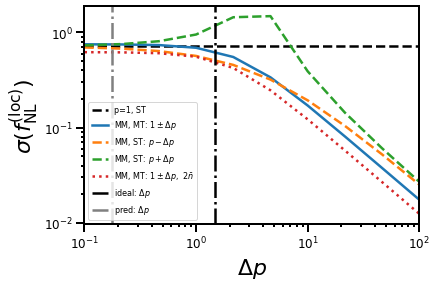

In [60]:
dps = np.logspace(-1,2,10)
fnl2tests,fnl3tests,fnl4tests,fnl5tests=[],[],[],[]
for deltap in dps:
    fnl2test = 1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins_mm,mubins,kF,alpha_z_mm,pkF_z_mm,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1-deltap),
                            i_nz_mm(zbins_mm)/3,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1+deltap),
                            i_nz_mm(zbins_mm)/3,
                            ) 
        
    )
    fnl5test = 1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins_mm,mubins,kF,alpha_z_mm,pkF_z_mm,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1-deltap),
                            2*i_nz_mm(zbins_mm)/3,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1+deltap),
                            2*i_nz_mm(zbins_mm)/3,
                            ) )
    #single tracer where we just increase/decrease p by deltap
    fnl3test = 1/np.sqrt(Fish_fnlfnl(zbins_mm,mubins,kF,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1-deltap),
                            i_nz_mm(zbins_mm),alpha_z_mm,pkF_z_mm
                            ) 
    )
    fnl4test = 1/np.sqrt(Fish_fnlfnl(zbins_mm,mubins,kF,
                            b_mm(zcs_mm),
                            bphi_p(b_mm(zcs_mm),p=1+deltap),
                            i_nz_mm(zbins_mm),alpha_z_mm,pkF_z_mm
                            ) 
    )
    fnl2tests.append(fnl2test)
    fnl3tests.append(fnl3test)
    fnl4tests.append(fnl4test)
    fnl5tests.append(fnl5test)

plt.axhline(1/np.sqrt(Fish_fnlfnl(zbins_mm,mubins,kF,b_mm(zcs_mm),
                      bphi_p(b_mm(zcs_mm),p=1.0),i_nz_mm(zbins_mm),
                      alpha_z_mm,pkF_z_mm)),ls='--',c='k',label='p=1, ST')
plt.plot(dps,fnl2tests,label='MM, MT: '+r'$1\pm\Delta p$')
plt.plot(dps,fnl3tests,label='MM, ST: '+r'$p-\Delta p$',ls='--')
plt.plot(dps,fnl4tests,label='MM, ST: '+r'$p+\Delta p$',ls='--')
plt.plot(dps,fnl5tests,label='MM, MT: '+r'$1\pm\Delta p$'+r'$,~ 2\bar{n}$',ls=':')
plt.axvline(mean_delta_p_ideal,c='black',ls='-.',label='ideal: '+r'$\Delta p $')
plt.axvline(mean_delta_p_pred,c='grey',ls='-.',label='pred: '+r'$\Delta p $')
plt.xlabel(r'$\Delta p$')
plt.ylabel(r'$\sigma(f_{\mathrm{NL}}^{(\mathrm{loc})})$')
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 8})
plt.xlim(dps.min(),dps.max())
plt.savefig('../plots/deltap_mm.pdf')
plt.show()

## SPHEREx:

In [61]:
#SPHEREx redshift uncertainty samples
sigma_z_vals = np.array([0.003, 0.01, 0.03, 0.1, 0.2])
nzdata_sx = np.genfromtxt('../data/spherex_data_all_samples.csv',delimiter=',',skip_header=2)
nz_sx_all = []
for i in range(len(sigma_z_vals)):
    nan_idxs = ~np.isnan(nzdata_sx[:,2*i])
    sort_idx = np.argsort(nzdata_sx[:,2*i][nan_idxs])
    nz_sx_all.append(ius(nzdata_sx[:,2*i][nan_idxs][sort_idx],nzdata_sx[:,2*i+1][nan_idxs][sort_idx],k=1,ext=1))

In [62]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function,bias
cosmology.setCosmology('planck15')
def mfunc_sx(M,z):  return mass_function.massFunction(M, z, q_out = 'dndlnM', mdef = 'fof', model = 'bhattacharya11')
def bh_sx(M,z): return bias.haloBias(M, model = 'bhattacharya11', z = z, mdef = 'fof')
fc = 0.8

In [63]:
def get_b_Mmin(z,mfunc,msearch,sigma_z_max = 0.01,fc=0.8):
    nz_this_sigma_z_max = 0.0
    for i in range(len(nz_sx_all)):
        if(sigma_z_vals[i]<=sigma_z_max): nz_this_sigma_z_max+=nz_sx_all[i](z)
    Mmin = msearch[np.argmin(np.abs(mfunc(msearch,z)-fc*nz_this_sigma_z_max))]
    if(Mmin<msearch[-1]):
        return bh_sx(Mmin,z)
    else:
        return 0.0

In [64]:
# SPHEREx setup
zbins_sx = np.linspace(0.1,3.0,65+1)
zcs_sx= (zbins_sx[1:]+zbins_sx[:-1])/2.0
fsky_sx = 0.65 

# cumulative number densities (combine samples of decreasing/increasing redshift error)
nzs_this_sigma_z_max = np.zeros((len(sigma_z_vals),len(zcs_sx)))
rev_nzs_this_sigma_z_max = np.zeros((len(sigma_z_vals),len(zcs_sx)))
partial_nzs_this_sigma_z_max = np.zeros((len(sigma_z_vals),len(zcs_sx)))
for i in range(len(sigma_z_vals)):
    nzs_this_sigma_z_max[i:,:]+=nz_sx_all[i](zcs_sx)
    rev_nzs_this_sigma_z_max[i:,:]+=nz_sx_all[len(sigma_z_vals)-1-i](zcs_sx)
    partial_nzs_this_sigma_z_max[i:,:]=nz_sx_all[i](zcs_sx)
    nzs_this_sigma_z_max[i][nzs_this_sigma_z_max[i]==0.0]=1e-16
    rev_nzs_this_sigma_z_max[i][rev_nzs_this_sigma_z_max[i]==0.0]=1e-16
    partial_nzs_this_sigma_z_max[i][partial_nzs_this_sigma_z_max[i]==0.0]=1e-16

# get the bias
mm_search = np.logspace(11,15.5,128)
bias_sx_0p003 = np.array([get_b_Mmin(z,mfunc_sx,mm_search,sigma_z_max = 0.003) for z in zcs_sx])
bias_sx_0p01 = np.array([get_b_Mmin(z,mfunc_sx,mm_search,sigma_z_max = 0.01) for z in zcs_sx])
bias_sx_0p03 = np.array([get_b_Mmin(z,mfunc_sx,mm_search,sigma_z_max = 0.03) for z in zcs_sx])
bias_sx_0p1 = np.array([get_b_Mmin(z,mfunc_sx,mm_search,sigma_z_max = 0.1) for z in zcs_sx])
bias_sx_0p2 = np.array([get_b_Mmin(z,mfunc_sx,mm_search,sigma_z_max = 0.2) for z in zcs_sx])
bias_sx_all = [bias_sx_0p003,bias_sx_0p01,bias_sx_0p03,bias_sx_0p1,bias_sx_0p2]

#weight the bias
#cumulative weighted bias
weight_bias_sx_all = np.zeros((len(sigma_z_vals),len(zcs_sx)))
for i in range(5):
    weight_bias_sx_all[i] = np.sum([bias_sx_all[j]*partial_nzs_this_sigma_z_max[j,:]/nzs_this_sigma_z_max[i,:] for j in range(i+1)],axis=0)
    weight_bias_sx_all[i][np.isnan(weight_bias_sx_all[i])]=1e-16
rev_weight_bias_sx_all = np.zeros((len(sigma_z_vals),len(zcs_sx)))
for i in range(5):
    rev_weight_bias_sx_all[i] = np.sum([bias_sx_all[len(sigma_z_vals)-1-j]*partial_nzs_this_sigma_z_max[len(sigma_z_vals)-1-j,:]/rev_nzs_this_sigma_z_max[i,:] for j in range(i+1)],axis=0)
    rev_weight_bias_sx_all[i][np.isnan(weight_bias_sx_all[i])]=1e-16



D1_by_Dz_sx = D/Planck15.scale_independent_growth_factor(zcs_sx)
kmin = 0.001 
kmax = 0.075 
Nk=100
kF_sx = np.logspace(np.log10(kmin),np.log10(kmax),Nk)
pkF_sx= np.interp(kF_sx,kk,pkk[0])
pkF_z_sx = pkF_sx/D1_by_Dz_sx.reshape([-1,1])**2 
alpha_sx = np.interp(kF_sx,Tkk[0,:],MTk)*kF_sx**-2
alpha_z_sx = alpha_sx*(D1_by_Dz_sx/Dz_norm_MD).reshape([-1,1]) 


Single tracer SPHEREx:

In [65]:
print("Single tracer: ", 1/np.sqrt(Fish_fnlfnl(zbins_sx,mubins,kF_sx,weight_bias_sx_all[-1],
                      bphi_p(weight_bias_sx_all[-1],p=1.0),nzs_this_sigma_z_max[-1], #use full sample with noahs redshift error
                      alpha_z_sx,pkF_z_sx,fsky=fsky_sx,z_err=0.2)))


Single tracer:  1.0541597511246412


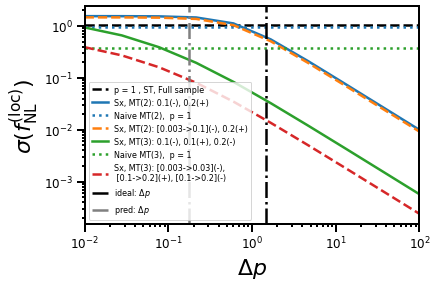

In [66]:
#SPHEREx version of the deltap plot
dps = np.logspace(-2,2,10)
fnl2tests,fnl3tests,fnl4tests,fnl5tests=[],[],[],[]
for deltap in dps:

    #two tracers
    fnl2test = 1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                    bias_sx_all[3],
                                    bphi_p(bias_sx_all[3],p=1+deltap),
                                    partial_nzs_this_sigma_z_max[3]/3,
                                    bias_sx_all[4],
                                    bphi_p(bias_sx_all[4],p=1-deltap),
                                    partial_nzs_this_sigma_z_max[4]/3,
                                    fsky=fsky_sx,z_err=sigma_z_vals[3],
                                    z_err2=sigma_z_vals[4])
    )

    fnl3test = 1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                    weight_bias_sx_all[3],
                                    bphi_p(weight_bias_sx_all[3],p=1-deltap),
                                    nzs_this_sigma_z_max[3]/3,
                                    bias_sx_all[4],
                                    bphi_p(bias_sx_all[4],p=1+deltap),
                                    partial_nzs_this_sigma_z_max[4]/3,
                                    fsky=fsky_sx,
                                    z_err=sigma_z_vals[3],
                                    z_err2=sigma_z_vals[4]))
    
    #triple tracer single
    fnl4test =  1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                        bias_sx_all[3],
                                        bphi_p(bias_sx_all[3],p=1-deltap),
                                        partial_nzs_this_sigma_z_max[3]/3,
                                        bias_sx_all[3],
                                        bphi_p(bias_sx_all[3],p=1+deltap),
                                        partial_nzs_this_sigma_z_max[3]/3,
                                        bias_sx_all[4],
                                        bphi_p(bias_sx_all[4],p=1-deltap),
                                        partial_nzs_this_sigma_z_max[4]/3,
                                        fsky=fsky_sx,z_err=sigma_z_vals[3],
                                        z_err2=sigma_z_vals[3],z_err3=sigma_z_vals[4]))
    
    #triple tracer cumul
    fnl5test =  1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                        weight_bias_sx_all[2],
                                        bphi_p(weight_bias_sx_all[2],p=1-deltap),
                                        nzs_this_sigma_z_max[2]/3,
                                        rev_weight_bias_sx_all[3],
                                        bphi_p(rev_weight_bias_sx_all[2],p=1+deltap),
                                        rev_nzs_this_sigma_z_max[2]/3,
                                        rev_weight_bias_sx_all[2],
                                        bphi_p(rev_weight_bias_sx_all[2],p=1-deltap),
                                        rev_nzs_this_sigma_z_max[2]/3,
                                        fsky=fsky_sx,z_err=sigma_z_vals[2],
                                        z_err2=sigma_z_vals[4],
                                        z_err3=sigma_z_vals[4]))

    fnl2tests.append(fnl2test)
    fnl3tests.append(fnl3test)
    fnl4tests.append(fnl4test)
    fnl5tests.append(fnl5test)

plt.axhline(1/np.sqrt(Fish_fnlfnl(zbins_sx,mubins,kF_sx,
                            weight_bias_sx_all[4],
                            bphi_p(weight_bias_sx_all[i],p=1),
                            nzs_this_sigma_z_max[4],
                            alpha_z_sx,pkF_z_sx,fsky=fsky_sx,z_err=sigma_z_vals[4])),
                            ls='--',c='k',
                            label='p = 1 , ST, Full sample'
                            )

plt.plot(dps,fnl2tests,label='Sx, MT(2): 0.1(-), 0.2(+)',ls='-')
plt.axhline(1/np.sqrt(Ffnl_alpha_beta_2_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                    bias_sx_all[3],
                                    bphi_p(bias_sx_all[3],p=1),
                                    partial_nzs_this_sigma_z_max[3],
                                    bias_sx_all[4],
                                    bphi_p(bias_sx_all[4],p=1),
                                    partial_nzs_this_sigma_z_max[4],
                                    fsky=fsky_sx,z_err=sigma_z_vals[3],
                                    z_err2=sigma_z_vals[4])),
                            ls=':',c='C0',
                            label='Naive MT(2),  p = 1 '
                )
plt.plot(dps,fnl3tests,label='Sx, MT(2): [0.003->0.1](-), 0.2(+)',ls='--')
plt.plot(dps,fnl4tests,label='Sx, MT(3): 0.1(-), 0.1(+), 0.2(-) ',ls='-')
plt.axhline(1/np.sqrt(Ffnl_alpha_beta_3_z_mu(zbins_sx,mubins,kF_sx,alpha_z_sx,pkF_z_sx,
                                        bias_sx_all[1],
                                        bphi_p(bias_sx_all[1],p=1),
                                        partial_nzs_this_sigma_z_max[1],
                                        bias_sx_all[3],
                                        bphi_p(bias_sx_all[3],p=1),
                                        partial_nzs_this_sigma_z_max[3],
                                        bias_sx_all[4],
                                        bphi_p(bias_sx_all[4],p=1),
                                        partial_nzs_this_sigma_z_max[4],
                                        fsky=fsky_sx,z_err=sigma_z_vals[1],
                                        z_err2=sigma_z_vals[3],z_err3=sigma_z_vals[4])),
                            ls=':',c='C2',
                            label='Naive MT(3),  p = 1 '
            )
plt.plot(dps,fnl5tests,label='Sx, MT(3): [0.003->0.03](-), \n [0.1->0.2](+), [0.1->0.2](-) ',ls='--')

plt.axvline(mean_delta_p_ideal,c='black',ls='-.',label='ideal: '+r'$\Delta p $')
plt.axvline(mean_delta_p_pred,c='grey',ls='-.',label='pred: '+r'$\Delta p $')
plt.xlabel(r'$\Delta p$')
plt.ylabel(r'$\sigma(f_{\mathrm{NL}}^{(\mathrm{loc})})$')
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 8})
plt.xlim(dps.min(),dps.max())
plt.savefig('../plots/deltap_sx.pdf')
plt.show()